In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# load dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

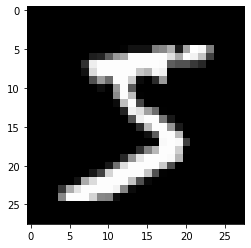

In [4]:
img = train_X[0]
plt.imshow(train_X[0], cmap='gray')

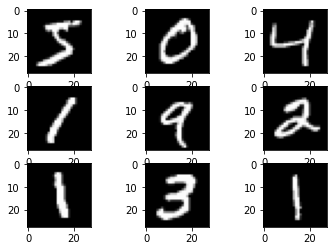

In [7]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_X[i], cmap='gray')
# show the figure
plt.show()

In [8]:
# summarize loaded dataset
print(f'Train: X = {train_X.shape}, y = {train_y.shape}')
print(f'Test: X = {test_X.shape}, y = {test_y.shape}')

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [9]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# canal = 1 => For gray scale
# to 4D

In [10]:
# reshape dataset to have a single channel
train_X = train_X.reshape((-1, 28, 28, 1))
test_X = test_X.reshape((-1, 28, 28, 1))

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
# one hot encode target values (60000) because there are only 10 classes and that classes are represented as unique integers.
#  (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [13]:
# summarize loaded dataset
print(f'Train: X = {train_X.shape}, y = {y_train.shape}')
print(f'Test: X = {test_X.shape}, y = {y_test.shape}')

Train: X = (60000, 28, 28, 1), y = (60000, 10)
Test: X = (10000, 28, 28, 1), y = (10000, 10)


In [14]:
# convert from integers to floats
train_norm = train_X.astype('float32')
test_norm = test_X.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [15]:
X_train, X_test = train_norm, test_norm

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

In [20]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
epochs = 50
batch_size = 64

In [23]:
# With data augmentation to prevent overfitting
# do not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_size)

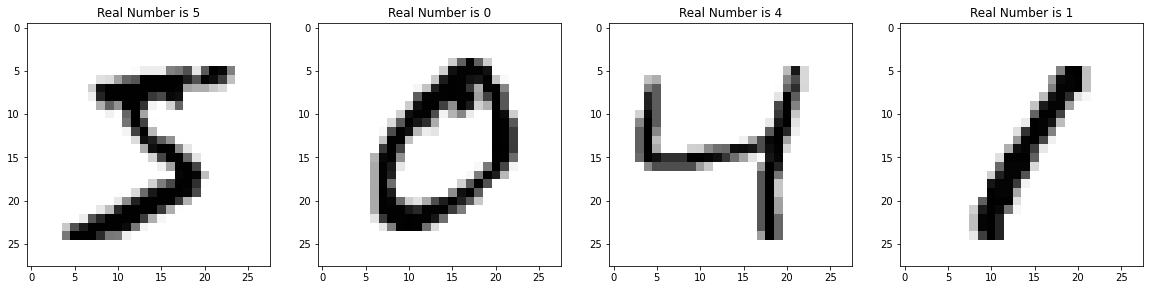

In [24]:
X_train__ = X_train.reshape(-1, 28, 28)
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

In [25]:
# Fit the model
history = model.fit(
    train_gen, 
      epochs = epochs, 
      steps_per_epoch = X_train.shape[0] // batch_size,
      validation_data = test_gen,
      validation_steps = X_test.shape[0] // batch_size
)

Epoch 1/50
937/937 [==============================] - 26s 27ms/step - loss: 0.2907 - accuracy: 0.9082 - val_loss: 0.1053 - val_accuracy: 0.9677
Epoch 2/50
937/937 [==============================] - 31s 33ms/step - loss: 0.1005 - accuracy: 0.9693 - val_loss: 0.0752 - val_accuracy: 0.9749
Epoch 3/50
937/937 [==============================] - 29s 31ms/step - loss: 0.0739 - accuracy: 0.9773 - val_loss: 0.0523 - val_accuracy: 0.9828
Epoch 4/50
937/937 [==============================] - 30s 32ms/step - loss: 0.0640 - accuracy: 0.9799 - val_loss: 0.0546 - val_accuracy: 0.9821
Epoch 5/50
937/937 [==============================] - 29s 31ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0525 - val_accuracy: 0.9836
Epoch 6/50
937/937 [==============================] - 29s 30ms/step - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.0387 - val_accuracy: 0.9877
Epoch 7/50
937/937 [==============================] - 30s 32ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0395 - val_accuracy:

In [26]:
history.history

{'loss': [0.2907339334487915,
  0.1004713773727417,
  0.07394292205572128,
  0.06404300779104233,
  0.055557262152433395,
  0.050237901508808136,
  0.04587119445204735,
  0.04315768554806709,
  0.03806217014789581,
  0.03807627037167549,
  0.03514974191784859,
  0.03460259363055229,
  0.03153460472822189,
  0.029359545558691025,
  0.02981068566441536,
  0.03051198273897171,
  0.02722076140344143,
  0.02739827334880829,
  0.024287637323141098,
  0.026008937507867813,
  0.02423856593668461,
  0.024022966623306274,
  0.02396336942911148,
  0.02253074198961258,
  0.020951583981513977,
  0.02206546999514103,
  0.021464884281158447,
  0.021080443635582924,
  0.018922114744782448,
  0.021048927679657936,
  0.018827978521585464,
  0.01789373904466629,
  0.01826179027557373,
  0.017434939742088318,
  0.017523154616355896,
  0.016543330624699593,
  0.01744907535612583,
  0.017245663329958916,
  0.01701662503182888,
  0.015653885900974274,
  0.016240395605564117,
  0.016112003475427628,
  0.01503

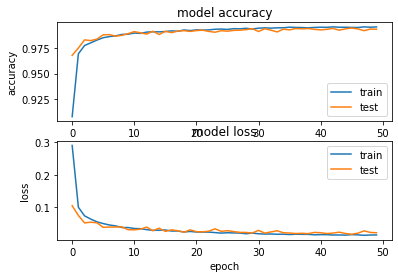

In [27]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [28]:
# save model => model.model because we used model = model.fit() instead of model.fit() directly
history.model.save('models/mnist_digits_model.h5')

In [29]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [31]:
model = load_model('models/mnist_digits_model.h5')

In [32]:
# Predicting Values

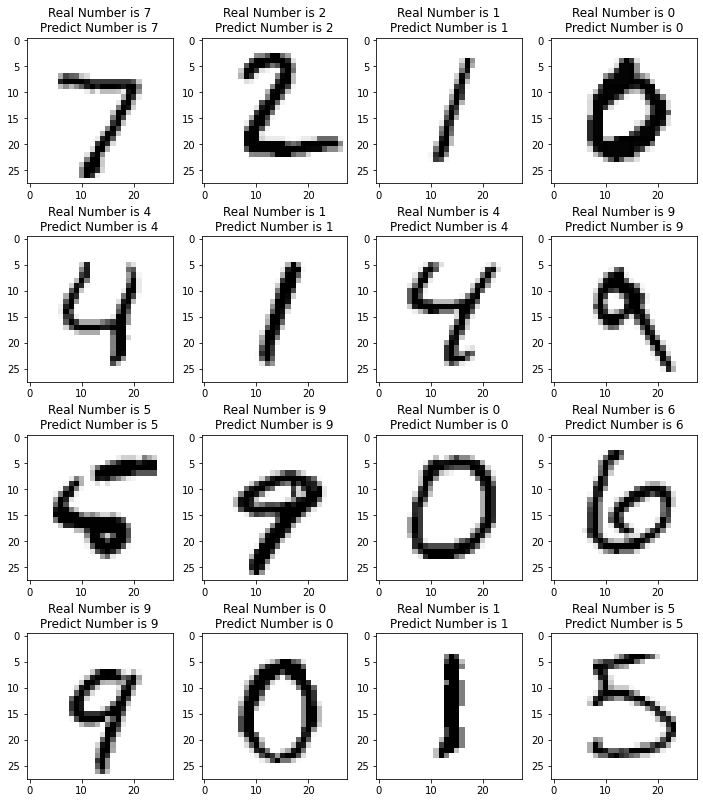

In [33]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(-1, 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [51]:
# load the image
filename = 'digit_five.png'
# load the image
pic = load_img(filename, color_mode = "grayscale", target_size=(28, 28))

In [52]:
pic

In [53]:
# convert to array
img = img_to_array(pic)
# reshape into a single sample with 1 channel
pred = img.reshape(1, 28, 28, 1)
# prepare pixel data
pred = pred.astype('float32')
pred = pred / 255.0

In [54]:
img.shape

(28, 28, 1)

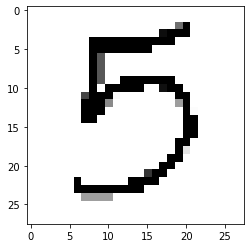

In [55]:
plt.imshow(img, cmap='gray')

In [56]:
pred.shape

(1, 28, 28, 1)

In [57]:
prediction = model.predict(pred)
print(prediction.argmax())

6
